In [1]:
from glob import glob
import os
from pathlib import Path
import random

import sidechainnet as scn

# Previous analysis before learning that a GPU node was failing

In [2]:
pl = scn.get_proteinnet_ids(12, "all", thinning=100)
len(pl)

104323

In [3]:
def do_glob(pth):
    items = [Path(p).stem for p in glob(pth)]
    items_set = set(items)
    assert len(items_set) == len(items), "Duplicates found."
    return items_set

In [4]:
unmin = do_glob("/net/pulsar/home/koes/jok120/scnmin220511/unmin/*pkl")

min1 = do_glob("/net/pulsar/home/koes/jok120/scnmin220519/min/*pkl")
failed1 = do_glob("/net/pulsar/home/koes/jok120/scnmin220519/failed/*")

min2 = do_glob("/net/pulsar/home/koes/jok120/scnmin220512/min/*pkl")
failed2 = do_glob("/net/pulsar/home/koes/jok120/scnmin220512/failed/*")

In [5]:
all_proteins = set(pl)

In [6]:
missing1 = all_proteins - set(min1)
missing2 = all_proteins - set(min2)

In [7]:
should_have_failed1 = missing1 - set(failed1)
should_have_failed2 = missing2 - set(failed2)

In [8]:
list(map(len, [all_proteins, unmin, min1, failed1, missing1, should_have_failed1]))

[104323, 0, 0, 0, 104323, 104323]

These proteins failed to generate unminimized versions.

In [10]:
did_not_make_unmin = all_proteins - unmin
len(did_not_make_unmin)

356

These proteins failed to minimize and reported their failure.

In [11]:
len(failed1), random.sample(failed1, 5)

(44019, ['4ESF_1_A', '4WZ7_11_G', '4IZE_1_A', '3O9O_1_A', '1P5W_2_A'])

These proteins failed to minimze but also did not report their failure.

In [14]:
unknown_failures1 = unmin - min1 - failed1
len(unknown_failures1), sorted(unknown_failures1)[:5]

(12962, ['122L_1_A', '123L_1_A', '125L_1_A', '156L_1_A', '157L_1_A'])

In [15]:
unknown_failures2 = unmin - min2 - failed2
len(unknown_failures2), sorted(unknown_failures2)[:5]

(13236, ['120L_1_A', '122L_1_A', '123L_1_A', '191L_1_A', '192L_1_A'])

In [16]:
unknown_failures1 == unknown_failures2

False

These proteins sucessfully minimized.

In [17]:
len(min1), len(min2), len(min1.union(min2))

(46988, 46910, 52873)

In [18]:
all_minimized = min1.union(min2)

In [19]:
remaining = all_proteins - all_minimized

In [20]:
len(remaining)

51451

In [21]:
sorted(remaining)[:5]

['10#1HF2_1_A', '10#2IJR_1_A', '10#3DB9_1_A', '10#3LM3_1_A', '10#3MK8_2_B']

## Find reason why failed

In [23]:
import os

In [ ]:
did_not_pickle = []

for scn12protein in all_proteins:
    if scn12protein not in os.listdir("/net/pulsar/home/koes/jok120/scnmin220511/unmin/")

In [24]:
os.listdir("/net/pulsar/home/koes/jok120/scnmin220511/unmin/")

['3QO0_3_C.pkl',
 '3N56_2_C.pkl',
 '5FGB_3_F.pkl',
 '1T3E_2_P.pkl',
 '3N57_2_C.pkl',
 '4M38_2_E.pkl',
 '1A38_2_P.pkl',
 '1HTM_1_A.pkl',
 '3OA6_4_G.pkl',
 '4BOH_3_M.pkl',
 '4V2W_2_C.pkl',
 '4N4F_2_C.pkl',
 '1Q1S_1_A.pkl',
 '4ZJ7_2_B.pkl',
 '1O6O_2_D.pkl',
 '1TZS_3_X.pkl',
 '5HDT_2_E.pkl',
 '3E50_2_C.pkl',
 '3IFN_3_P.pkl',
 '4WNN_3_T.pkl',
 '4HDQ_3_C.pkl',
 '2B2W_3_D.pkl',
 '1YTV_2_M.pkl',
 '1KO6_2_B.pkl',
 '4EZN_2_C.pkl',
 '3IUR_2_B.pkl',
 '3N9N_2_B.pkl',
 '10#4USL_2_D.pkl',
 '5EKF_1_B.pkl',
 '3BAE_3_A.pkl',
 '4X2H_3_C.pkl',
 '2YVC_2_D.pkl',
 '3EMW_2_B.pkl',
 '3WGX_2_C.pkl',
 '4BJT_2_D.pkl',
 '4EZP_2_C.pkl',
 '3P6Z_3_C.pkl',
 '4HTV_2_B.pkl',
 '1UM2_2_C.pkl',
 '4GGD_2_C.pkl',
 '4FT4_2_P.pkl',
 '4N1A_2_G.pkl',
 '3GZ2_2_P.pkl',
 '3LGE_2_E.pkl',
 '4J6S_2_E.pkl',
 '2UXN_3_E.pkl',
 '4MMY_3_C.pkl',
 '3EGS_3_C.pkl',
 '2ATP_2_E.pkl',
 '4JLQ_2_B.pkl',
 '4GQB_3_C.pkl',
 '4WNL_2_E.pkl',
 '3ZMS_3_C.pkl',
 '1RDT_4_E.pkl',
 '4LCD_2_C.pkl',
 '4KA3_2_B.pkl',
 '4HKC_2_B.pkl',
 '10#4DT7_3_E.pkl',
 '1T7F_2

# Analysis of minimized data

In [57]:
d = scn.load('debug', scn_dataset=True, local_scn_path='/home/jok120/scnmin220519/scn_minimized.pkl')

SidechainNet was loaded from /home/jok120/scnmin220519/scn_minimized.pkl.


In [3]:
len(d)

53870

In [4]:
import matplotlib.pyplot as plt

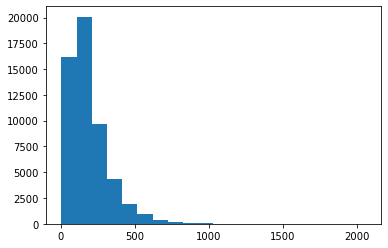

In [7]:
plt.hist(d.lengths, bins=20)
plt.show()

In [15]:
d[2000].hcoords.shape, d[2000].coords.shape

((476, 3), (476, 3))

In [18]:
d.splits

['train',
 'valid-10',
 'valid-20',
 'valid-30',
 'valid-40',
 'valid-50',
 'valid-70',
 'valid-90',
 'test']

In [22]:
d.get_protein_list_by_split_name('valid-30')

[SCNProtein(30#3HE4_1_A, len=45, missing=0, split='valid-30'),
 SCNProtein(30#3U88_2_M, len=56, missing=0, split='valid-30'),
 SCNProtein(30#3OSS_1_C, len=65, missing=0, split='valid-30'),
 SCNProtein(30#2MSE_3_D, len=73, missing=0, split='valid-30'),
 SCNProtein(30#2MY6_1_A, len=91, missing=0, split='valid-30'),
 SCNProtein(30#4ML7_2_B, len=98, missing=0, split='valid-30'),
 SCNProtein(30#2K0M_1_A, len=104, missing=0, split='valid-30'),
 SCNProtein(30#4MNN_1_A, len=165, missing=0, split='valid-30'),
 SCNProtein(30#3V68_1_A, len=248, missing=0, split='valid-30'),
 SCNProtein(30#1V7Z_1_A, len=257, missing=0, split='valid-30'),
 SCNProtein(30#3R6V_1_A, len=458, missing=0, split='valid-30'),
 SCNProtein(30#2YEQ_1_A, len=522, missing=0, split='valid-30')]

In [26]:
for p in d:
    assert len(p.seq) == p.coords.shape[0] // 14
    assert len(p.seq) == p.angles.shape[0]

In [24]:
1 == 2 / 2 == 3 / 3

True

In [25]:
1 == 2 / 2

True

In [27]:
p = d[3].copy()

In [28]:
p

SCNProtein(4BOH_3_M, len=4, missing=0, split='train')

In [29]:
p.angles

array([[        nan, -0.69656843,  0.06910187,  2.00253329,  2.17629692,
         2.32617953,  1.51370858,         nan,         nan,         nan,
                nan,         nan],
       [-2.57927471,  1.77921977, -3.1649278 ,  1.90005246,  2.04247178,
         2.32579977,  1.57975444,  0.91527435, -2.15420772, -1.7594586 ,
        -1.40975295,         nan],
       [-1.29230612,  2.57030387,  2.95268732,  1.77549132,  2.04220077,
         1.9928925 ,  3.05486638,  0.0785785 , -0.08109314,         nan,
                nan,         nan],
       [-1.12117894,  2.74342036,         nan,  1.92932154,         nan,
                nan,  3.08874644, -1.26810832, -2.95780475, -3.12458468,
         1.47880086,  0.06874511]])

In [30]:
p.add_hydrogens(from_angles=True)

In [31]:
p

SCNProtein(4BOH_3_M, len=4, missing=0, split='train')

In [32]:
p.to_3Dmol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:
p.hcoords

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000005e-03],
       [ 1.44200003e+00,  0.00000000e+00,  1.00000005e-03],
       [ 2.06883645e+00,  1.36054409e+00,  1.00000005e-03],
       [ 3.06746459e+00,  1.57703996e+00,  6.83870673e-01],
       [ 2.00545621e+00, -8.25976372e-01, -1.15180337e+00],
       [-3.37144925e-01, -9.52067897e-01,  1.00000005e-03],
       [ 1.65379572e+00, -4.49804217e-01,  9.71009672e-01],
       [ 3.09467559e+00, -8.01953851e-01, -1.11827543e+00],
       [ 1.66236670e+00, -1.85672099e+00, -1.06261164e+00],
       [ 1.66236686e+00, -4.10075494e-01, -2.09912396e+00],
       [-3.37144937e-01,  4.76034029e-01,  8.25514985e-01],
       [-3.37144949e-01,  4.76033868e-01, -8.23515125e-01],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan

In [41]:
names = p.get_atom_names()
for i in range(len(p.hcoords)):
    for x, j in enumerate(range(i, i+26)):
        print(p.hcoords[j], names[i][x])

[0.    0.    0.001] N
[1.44200003e+00 0.00000000e+00 1.00000005e-03] CA
[2.06883645e+00 1.36054409e+00 1.00000005e-03] C
[3.06746459 1.57703996 0.68387067] O
[ 2.00545621 -0.82597637 -1.15180337] CB
[-0.33714493 -0.9520679   0.001     ] H
[ 1.65379572 -0.44980422  0.97100967] HA
[ 3.09467559 -0.80195385 -1.11827543] HB1
[ 1.6623667  -1.85672099 -1.06261164] HB2
[ 1.66236686 -0.41007549 -2.09912396] HB3
[-0.33714494  0.47603403  0.82551499] H2
[-0.33714495  0.47603387 -0.82351512] H3
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[nan nan nan] PAD
[1.44200003e+00 0.00000000e+00 1.00000005e-03] N
[2.06883645e+00 1.36054409e+00 1.00000005e-03] CA
[3.06746459 1.57703996 0.68387067] C
[ 2.00545621 -0.82597637 -1.15180337] O
[-0.33714493 -0.9520679   0.001     ] CB
[ 1.65379572 -0.44980422  0.97100967] CG
[ 

IndexError: list index out of range

In [43]:
p.torch()
p.get_atom_names(zip_coords=True)

0  N    [0.    0.    0.001]
1  CA   [1.44200003e+00 0.00000000e+00 1.00000005e-03]
2  C    [2.06883645e+00 1.36054409e+00 1.00000005e-03]
3  O    [3.06746459 1.57703996 0.68387067]
4  CB   [ 2.00545621 -0.82597637 -1.15180337]
5  H    [-0.33714493 -0.9520679   0.001     ]
6  HA   [ 1.65379572 -0.44980422  0.97100967]
7  HB1  [ 3.09467559 -0.80195385 -1.11827543]
8  HB2  [ 1.6623667  -1.85672099 -1.06261164]
9  HB3  [ 1.66236686 -0.41007549 -2.09912396]
10 H2   [-0.33714494  0.47603403  0.82551499]
11 H3   [-0.33714495  0.47603387 -0.82351512]
12 PAD  [nan nan nan]
13 PAD  [nan nan nan]
14 PAD  [nan nan nan]
15 PAD  [nan nan nan]
16 PAD  [nan nan nan]
17 PAD  [nan nan nan]
18 PAD  [nan nan nan]
19 PAD  [nan nan nan]
20 PAD  [nan nan nan]
21 PAD  [nan nan nan]
22 PAD  [nan nan nan]
23 PAD  [nan nan nan]
24 PAD  [nan nan nan]
25 PAD  [nan nan nan]
26 N    [ 1.60736895  2.43734169 -0.72645795]
27 CA   [ 0.45871425  2.63799047 -1.57480729]
28 C    [ 0.82192922  3.6027081  -2.66172886]
29 O 

In [49]:
d2 = scn.load('debug', local_scn_path="/home/jok120/sidechainnet_data/sidechainnet_casp12_100.pkl", scn_dataset=True)

SidechainNet was loaded from /home/jok120/sidechainnet_data/sidechainnet_casp12_100.pkl.


In [53]:
for minp in d:
    try:
        unminp = d2[minp.id]
        minp.coords = unminp.coords
        minp.hcoords = unminp.hcoords
        minp.angles = unminp.angles
    except KeyError:
        print(minp)

SCNProtein(4V6W_9_Ad, len=52, missing=0, split='train')
SCNProtein(50#3J9M_48_o, len=94, missing=0, split='valid-50')


In [55]:
for p in d2:
    if "4V6W" in p.id:
        print(p)

SCNProtein(4V6W_76_Cn, len=25, missing=0, split='train')
SCNProtein(4V6W_73_Cl, len=50, missing=0, split='train')
SCNProtein(4V6W_75_Cm, len=52, missing=0, split='train')
SCNProtein(4V6W_24_Ae, len=58, missing=0, split='train')
SCNProtein(4V6W_22_Ac, len=62, missing=0, split='train')
SCNProtein(4V6W_72_Ck, len=70, missing=0, split='train')
SCNProtein(4V6W_19_AZ, len=74, missing=0, split='train')
SCNProtein(4V6W_25_Af, len=80, missing=0, split='train')
SCNProtein(4V6W_17_AV, len=82, missing=0, split='train')
SCNProtein(4V6W_21_Ab, len=84, missing=0, split='train')
SCNProtein(4V6W_77_Cp, len=91, missing=0, split='train')
SCNProtein(4V6W_71_Cj, len=92, missing=0, split='train')
SCNProtein(4V6W_4_AK, len=95, missing=0, split='train')
SCNProtein(4V6W_65_Cc, len=100, missing=0, split='train')
SCNProtein(4V6W_3_AU, len=102, missing=0, split='train')
SCNProtein(4V6W_78_Co, len=104, missing=0, split='train')
SCNProtein(4V6W_20_Aa, len=107, missing=0, split='train')
SCNProtein(4V6W_66_Cd, len=11

In [58]:
d.filter(lambda prot: prot.id not in ["4V6W_9_Ad", "50#3J9M_48_o"])

2 (0.0%) data set entries were excluded by user-defined function.


In [54]:
d.pickle("/home/jok120/scnmin220519/scn_uminimized.pkl",
         description='An unminimized complement to scnmin220519/scn_minimized.pkl.')

In [59]:
d.pickle("/home/jok120/scnmin220519/scn_minimizedv2.pkl",
         description='A minimized version of SidechainNet created on May 25, 2022.')

In [60]:
del d2

In [2]:
x = scn.load('debug', scn_dataset=True, local_scn_path='/home/jok120/scnmin220519/scn_minimized.pkl')
print(x)
y = scn.load('debug', scn_dataset=True, local_scn_path='/home/jok120/scnmin220519/scn_minimizedv2.pkl')
print(y)

SidechainNet was loaded from /home/jok120/scnmin220519/scn_minimized.pkl.
SCNDataset(n=53870)
SidechainNet was loaded from /home/jok120/scnmin220519/scn_minimizedv2.pkl.
SCNDataset(n=53868)


In [9]:
z = scn.load('debug', scn_dataset=True, local_scn_path='/home/jok120/scnmin220519/scn_unminimized.pkl')
print(z)

SidechainNet was loaded from /home/jok120/scnmin220519/scn_unminimized.pkl.
SCNDataset(n=53870)


In [10]:
z.filter(lambda prot: prot.id not in ["4V6W_9_Ad", "50#3J9M_48_o"])

2 (0.0%) data set entries were excluded by user-defined function.


In [11]:
z

SCNDataset(n=53868)

In [12]:
z.pickle("/home/jok120/scnmin220519/scn_unminimized.pkl",
         description='An unminimized complement to scnmin220519/scn_minimized.pkl.')